## Predicting Obisty Level Using Logistic Regrission Algorithm

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

#### EDA

In [6]:
# Reading the data from csv file
obesity_level_dataset=pd.read_csv('/content/ObesityDataSet.csv')
obesity_level_dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [7]:
# Feature names and its datatypes
obesity_level_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
obesity_level_dataset.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [9]:
# Select and separately store Numerical and Categorical features in different variables
numerical_data = obesity_level_dataset.select_dtypes(include='number')
numeric_columns=numerical_data.columns.tolist()
print(f'There are {len(numeric_columns)} numerical features: {numeric_columns}', '\n')
categorical_data=obesity_level_dataset.select_dtypes(include= 'object')
categorical_columns=categorical_data.columns.tolist()
print(f'There are {len(categorical_columns)} categorical features: {categorical_columns[:-1]}', '\n')

There are 8 numerical features: ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] 

There are 9 categorical features: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'] 



In [10]:
# Checking how many values for our target variable
obesity_level_dataset.NObeyesdad.unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [11]:
numerical_data.skew()

Age       1.529100
Height   -0.012855
Weight    0.255410
FCVC     -0.432906
NCP      -1.107097
CH2O     -0.104912
FAF       0.498490
TUE       0.618502
dtype: float64

Features shows moderate range of positive and negative skew, except age.

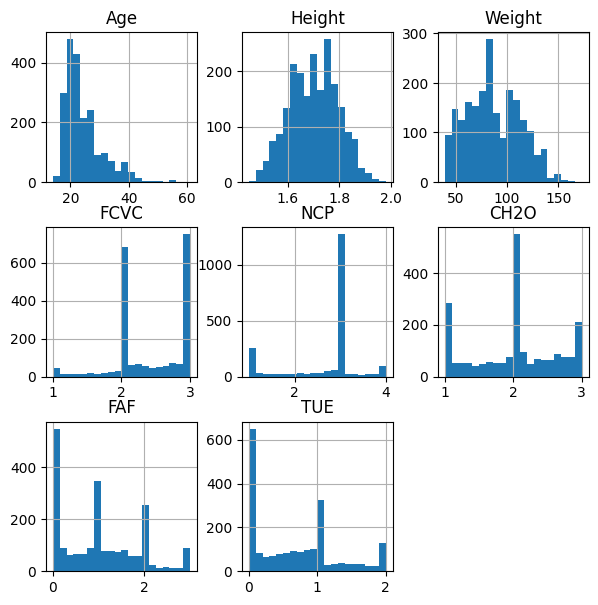

In [12]:
# To find the distributions and outlier in the each feature, we will use histogram
numerical_data.hist(figsize=(7,7),bins=20)
plt.show()

Gender



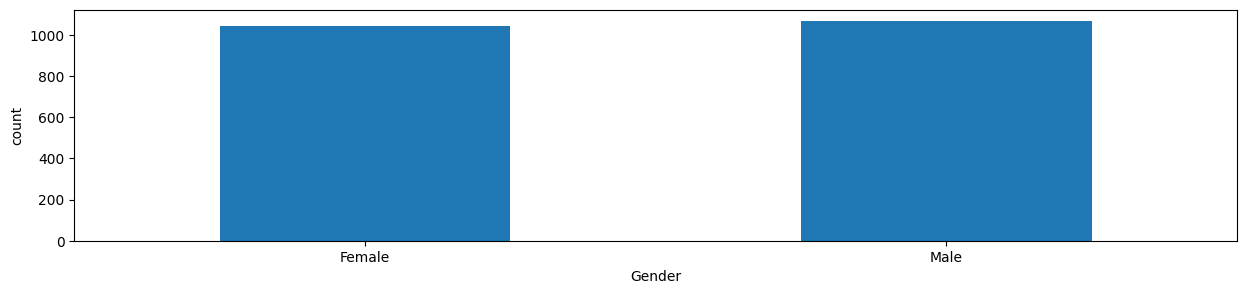

family_history_with_overweight



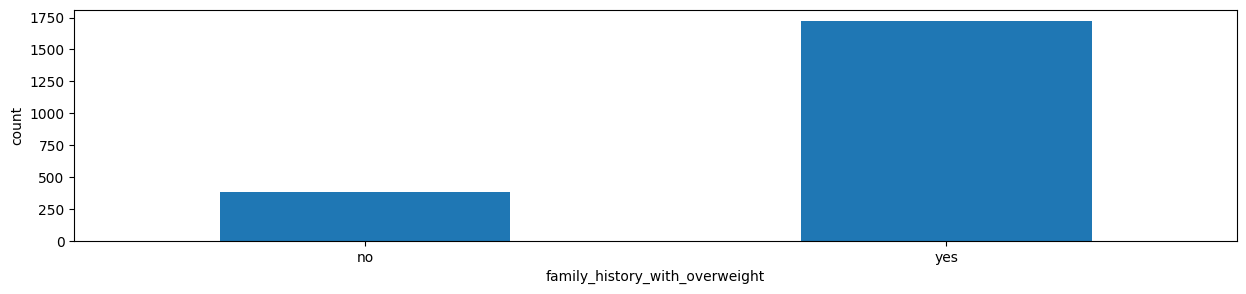

FAVC



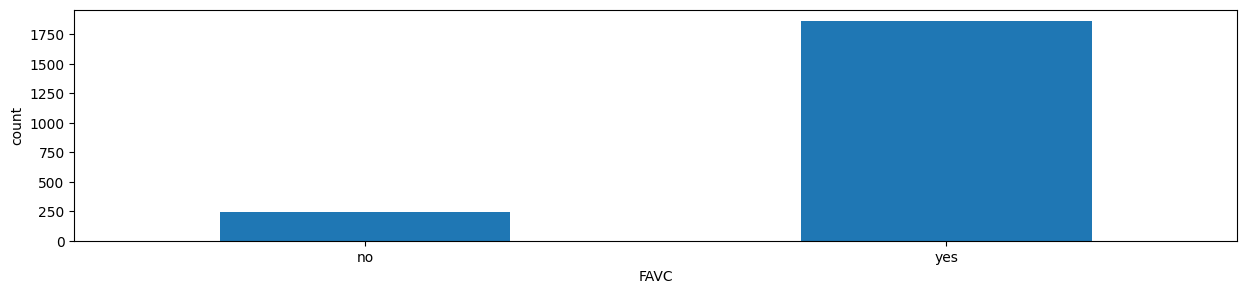

CAEC



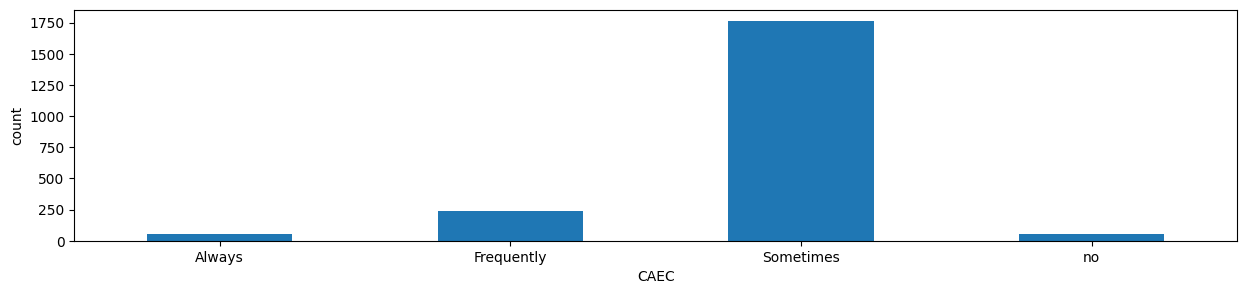

SMOKE



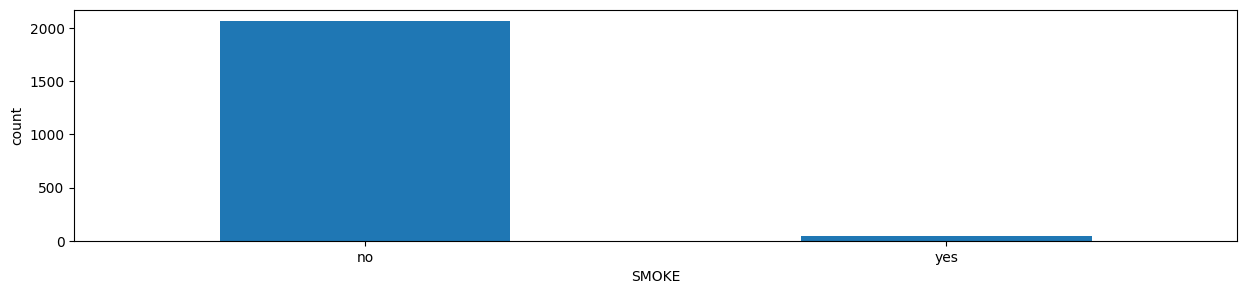

SCC



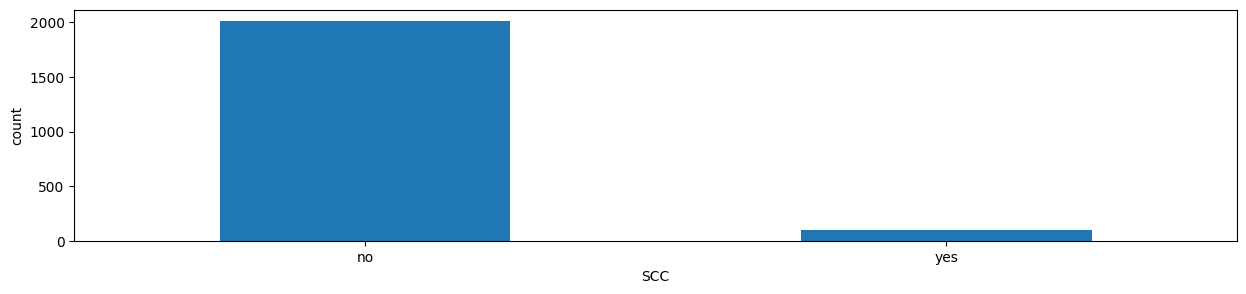

CALC



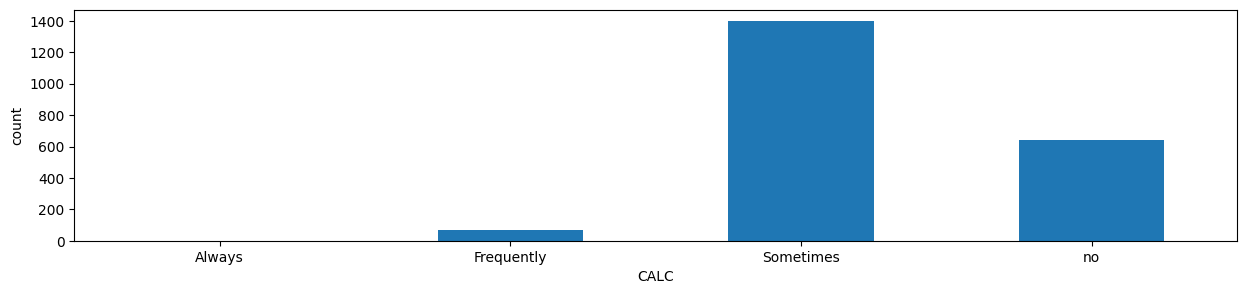

MTRANS



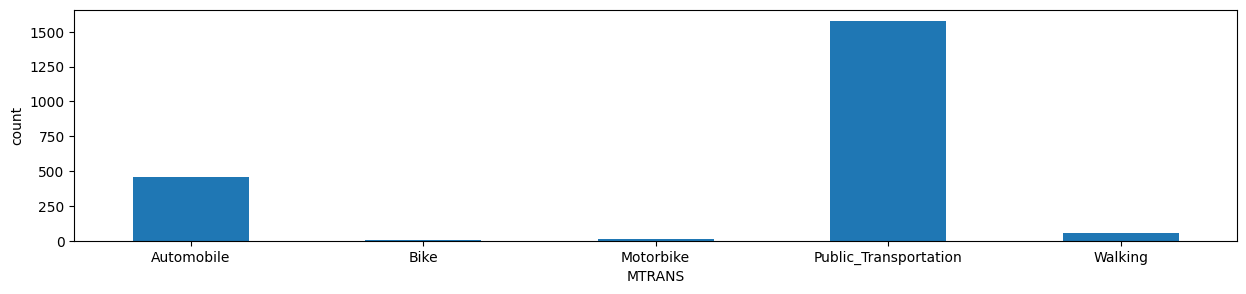

NObeyesdad



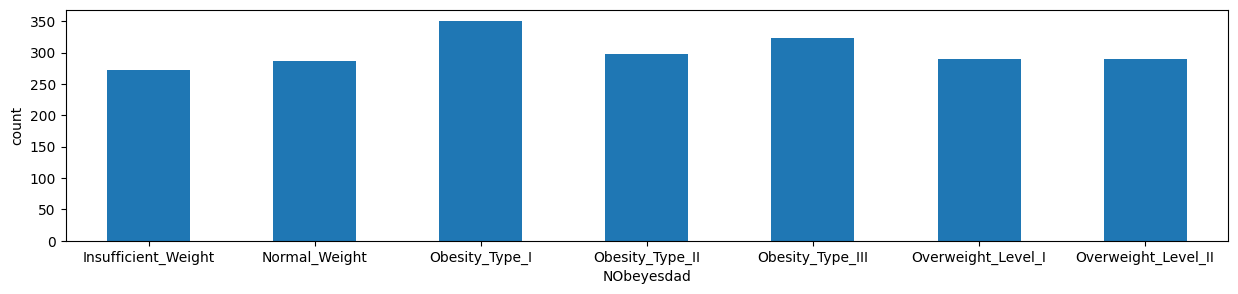

In [13]:
# Barplot of unique value counts in every categorical features,through looping generate bar plots of unqiue value counts in each variable
for col in categorical_columns:
 #   if col != 'NObeyesdad':
       # print()
    print(f"\033[1m{col}\033[0m\n") #print column name above the plot
    categorical_data[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col,ylabel='count',figsize=(15,3))
    plt.show()

From the barplots of unique values in each categorical most features shows imbalanced data of the unique values in that specific feature. But for target feature it is almost balanced.

#### Split Feautres and Target Variables

In [14]:
X = obesity_level_dataset.drop(['NObeyesdad'], axis=1)
y=obesity_level_dataset['NObeyesdad']

In [15]:
le = LabelEncoder()
y = le.fit_transform(y)

In [16]:
X[1:1]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS


#### Splitting the dataset into the Training set and Test set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Scaling

In [18]:
X_train.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS'],
      dtype='object')

In [19]:
sc = StandardScaler()
X_train[numeric_columns] = sc.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = sc.transform(X_test[numeric_columns])

#### Encoding Categorical Data

In [20]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns[:-1])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.transform(X_test))


In [21]:
def LogisticRegression_Function(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state = 0,max_iter=1000)
    classifier.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred = classifier.predict(X_test)
   # print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
    from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score
    accurate_predictions = accuracy_score(y_test, y_pred, normalize=False)
    precisionScore=precision_score(y_test, y_pred,average ='weighted')
    return print("The number of correct predictions is: "+ str(accurate_predictions)+" out of: "+str(len(y_test))+"\nThe precision score is: "+str(precisionScore))

In [22]:
LogisticRegression_Function(X_train, X_test, y_train, y_test)

The number of correct predictions is: 478 out of: 528
The precision score is: 0.9038900940593866
